# 2PI effective action for SDE with quadratic non-linearity and additive noise

Simulations for Fig. 8 of [The two-particle irreducible effective action for classical stochastic processes](https://doi.org/10.1088/1751-8121/ac73c6).

In [1]:
using DrWatson
@quickactivate "The Two-Particle Irreducible Effective Action for Classical Stochastic Processes"

include("../src/ClassicalFixedStepTwoTimeSolver.jl")

using Roots, LinearAlgebra, HDF5
using PyPlot
PyPlot.plt.style.use("./paper.mplstyle")

## Parameters

In [2]:
# time parameters
delta_t = 10.0/2^10;

n = 1128
T = n * delta_t;

In [3]:
# parameters
α = 1.0
D = 1.5
β = 0.15
params = [α, D + 0.0im, β]

# initial conditions
x₀ = -10 * ones(ComplexF64, 1, 1)
F₀ = 2 * ones(ComplexF64, 1, 1)
K₀ = ones(ComplexF64, 1, 1);

In [4]:
times = abs(α) .* range(0, length=n + 1, stop=T) |> collect;

In [5]:
# h5write("data.h5", "parameters/ini", [x₀[1, 1], F₀[1, 1], K₀[1, 1]] .|> real)
# h5write("data.h5", "parameters/values", [α, β, D] .|> real)

## Solver

In [6]:
x, F, K = ClassicalFixedStepTwoTimeSolver.simulation(n, T, 1, params, [x₀, F₀, K₀]);

In [7]:
# equal-time quantities
x_tt = [zeros(ComplexF64, n + 1) for _ in 1:1, _ in 1:1]
F_tt = [zeros(ComplexF64, n + 1) for _ in 1:1, _ in 1:1]

x_tt[1, 1] = (x[1, 1] |> diag)
x = x_tt

F_tt[1, 1] = F[1, 1] |> diag;

To generate the first-order data (i.e. 2PI-I), go to the top of `srcdir() * "/equations.jl"` and set `withIntegrals = false`.

In [8]:
# h5write("../data/test.h5", "first-order/x_t", x[1, 1] |> real)
# h5write("../data/test.h5", "first-order/F_tt", F_tt[1, 1] |> real)

To generate the second-order data (i.e. 2PI-II), go to the top of `srcdir() * "/equations.jl"` and set `withIntegrals = true`.

In [9]:
# h5write("../data/test.h5", "second-order/x_t", x[1, 1] |> real)
# h5write("../data/test.h5", "second-order/F_tt", F_tt[1, 1] |> real)

### Example plot

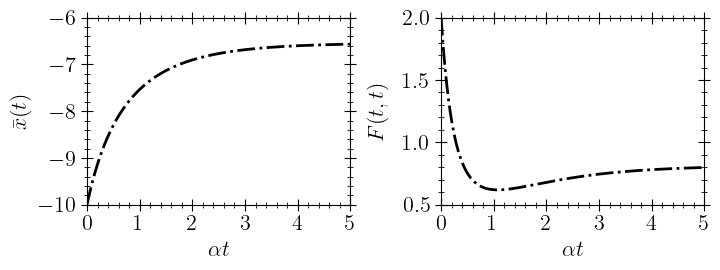

In [10]:
fig = figure(figsize=(7, 2.5))

ax = fig.add_subplot(121)
plot(times, x[1, 1] |> real, lw=2, "-.k")
xlim(0, 5)
xticks([t for t in 0:5])
ylim(-10., -6)
xlabel("\$ \\alpha t \$")
ylabel("\$ \\bar{x}(t) \$")

ax = fig.add_subplot(122)
plot(times, F_tt[1, 1] , lw=2, "-.k")
xlim(0, 5)
xticks([t for t in 0:5])
ylim(0.5, 2)
xlabel("\$ \\alpha t \$")
ylabel("\$ F(t, t) \$", labelpad=10.0)

tight_layout(pad=0, w_pad=0.5, h_pad=0.5)

## Paper plots from data

In [11]:
file = "../data/paper";

In [12]:
data = h5open(file*".h5", "r")

🗂️ HDF5.File: (read-only) ../data/paper.h5
├─ 📂 SRIW1_500100_batch_1
│  ├─ 🔢 F_sim
│  └─ 🔢 x_sim
├─ 📂 SRIW1_500100_batch_2
│  ├─ 🔢 F_sim
│  └─ 🔢 x_sim
├─ 📂 SRIW1_500100_batch_3
│  ├─ 🔢 F_sim
│  └─ 🔢 x_sim
├─ 📂 SRIW1_500100_batch_4
│  ├─ 🔢 F_sim
│  └─ 🔢 x_sim
├─ 📂 SRIW2_500100_batch_1
│  ├─ 🔢 F_sim
│  └─ 🔢 x_sim
├─ 📂 SRIW2_500100_batch_2
│  ├─ 🔢 F_sim
│  └─ 🔢 x_sim
├─ 📂 SRIW2_500100_batch_3
│  ├─ 🔢 F_sim
│  └─ 🔢 x_sim
├─ 📂 SRIW2_500100_batch_4
│  ├─ 🔢 F_sim
│  └─ 🔢 x_sim
├─ 📂 SRIW2_500100_batch_5
│  ├─ 🔢 F_sim
│  └─ 🔢 x_sim
├─ 📂 SRIW2_500100_batch_6
│  ├─ 🔢 F_sim
│  └─ 🔢 x_sim
├─ 📂 SRIW2_500100_batch_7
│  ├─ 🔢 F_sim
│  └─ 🔢 x_sim
├─ 📂 SRIW2_500100_batch_8
│  ├─ 🔢 F_sim
│  └─ 🔢 x_sim
├─ 📂 first-order
│  ├─ 🔢 F_tt
│  └─ 🔢 x_t
├─ 📂 parameters
│  ├─ 🔢 ini
│  └─ 🔢 values
└─ 📂 second-order
   ├─ 🔢 F_tt
   └─ 🔢 x_t

In [13]:
close(data)

In [14]:
α, β, D = h5read(file*".h5", "parameters/values")

3-element Vector{Float64}:
 1.0
 0.15
 1.5

In [15]:
x_t_1 = h5read(file*".h5", "first-order/x_t")
x_t_2 = h5read(file*".h5", "second-order/x_t")
F_tt_1 = h5read(file*".h5", "first-order/F_tt")
F_tt_2 = h5read(file*".h5", "second-order/F_tt");

In [16]:
# https://journals.aps.org/pre/abstract/10.1103/PhysRevE.101.042124
# https://arxiv.org/abs/1812.09345
m = α + 2β * x_t_1[end]
A = 2β^2 * D / m
m₁ = 3m/2 + sqrt(m^2/4 - A)
m₂ = 3m/2 - sqrt(m^2/4 - A);
Δₓₓ(t) = (0.5D / (m₂^2 - m₁^2)) * (exp(m₁ * abs(t)) * (m₁^2 - 4m^2 + A) / m₁ - exp(m₂ * abs(t)) * (m₂^2 - 4m^2 + A) / m₂);
x_steady(x) = α * x + β * x^2 + β *  0.5 * D/(-α - 2*β*x);

In [17]:
batches = 4
x_sim_SRIW1 = sum([h5read(file*".h5", "SRIW1_500100_batch_"*string(k)*"/x_sim") for k in 1:batches]) / batches
F_sim_SRIW1 = sum([h5read(file*".h5", "SRIW1_500100_batch_"*string(k)*"/F_sim") for k in 1:batches]) / batches

batches = 8
x_sim_SRIW2 = sum([h5read(file*".h5", "SRIW2_500100_batch_"*string(k)*"/x_sim") for k in 1:batches]) / batches
F_sim_SRIW2 = sum([h5read(file*".h5", "SRIW2_500100_batch_"*string(k)*"/F_sim") for k in 1:batches]) / batches

x_1PI = find_zero(x_steady, -α/β)
F_1PI = Δₓₓ(0);

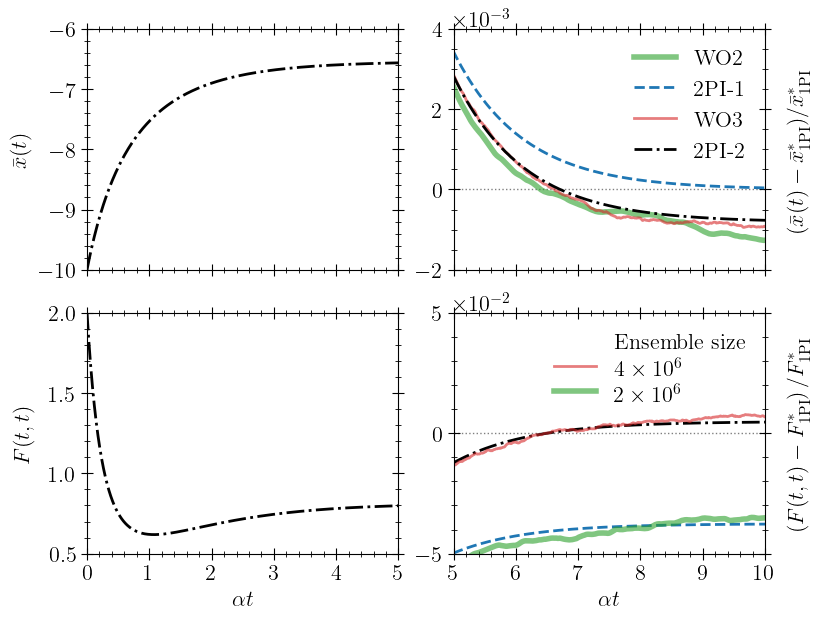

In [18]:
fig = figure(figsize=(8, 6))

ax = fig.add_subplot(221)
plot(times, (x_t_2), lw=2, "-.k")
xlim(0, 5)
xticks([t for t in 0:5])
ax.set_xticklabels([])
ylim(-10., -6)
ylabel("\$ \\bar{x}(t) \$")

ax = fig.add_subplot(223)
plot(times, F_tt_2 , lw=2, "-.k")
xlim(0, 5)
xticks([t for t in 0:5])
ylim(0.5, 2)
xlabel("\$ \\alpha t \$")
ylabel("\$ F(t, t) \$", labelpad=10.0)

ax = fig.add_subplot(222)
axhline(0., c="k", ls=":", lw=1, alpha=0.5)
plot(times, abs.(x_sim_SRIW1 ./ x_1PI) .- 1, "C2", lw=4, alpha=0.6, label="WO2")
plot(times, abs.(x_t_1 ./ x_1PI) .- 1, lw=2, "--C0", label="2PI-1")
plot(times, abs.(x_sim_SRIW2 ./ x_1PI) .- 1, c="C3", lw=2, alpha=0.6, label="WO3")
plot(times, abs.(x_t_2 ./ x_1PI) .- 1, lw=2, "-.k", label="2PI-2")

xlim(5, 10)
xticks([t for t in 5:10])
ax.set_xticklabels([])
ylim(-0.002, 0.004)
ylabel("\$ (\\bar{x}(t) - \\bar{x}^*_{\\mathrm{1PI}}) / \\bar{x}^*_{\\mathrm{1PI}}\$", labelpad=16.0)
ax.yaxis.set_label_position("right")
ax.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
legend(frameon=false, handlelength=1.9)

ax = fig.add_subplot(224)
axhline(0., c="k", ls=":", lw=1, alpha=0.5)
plot(times, F_tt_1 ./ F_1PI .- 1, lw=2, "--C0")
plot(times, F_tt_2 ./ F_1PI .- 1, lw=2, "-.k")
plot([], [], label="Ensemble size", lw=0)
plot(times, F_sim_SRIW2 ./ F_1PI .- 1, c="C3", lw=2, alpha=0.6, label="\$4\\times 10^6\$")
plot(times, F_sim_SRIW1./ F_1PI .- 1, "C2", lw=4, alpha=0.6, label="\$2\\times 10^6\$")

xlim(5, 10)
xticks([t for t in 5:10])
yticks([-0.05, 0.0, 0.05])
ylim((-0.05, 0.05))
xlabel("\$ \\alpha t \$")
ylabel("\$ \\left(F(t, t) - F^*_{\\mathrm{1PI}} \\right) / F^*_{\\mathrm{1PI}}\$", labelpad=16.0)
ax.yaxis.set_label_position("right")
ax.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
leg = ax.legend(frameon=false, handlelength=1.9, labelspacing=0.25)

tight_layout(pad=0, w_pad=0.5, h_pad=0.5)
# savefig("../plots/neuron_dynamics.pdf")

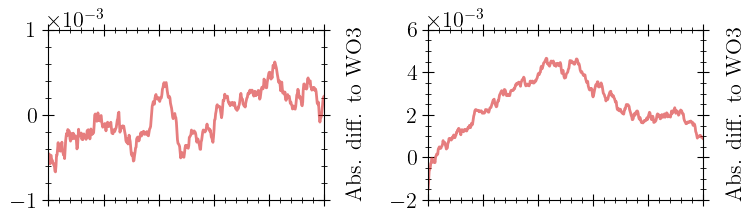

In [19]:
fig = figure(figsize=(8, 2.5))

ax = fig.add_subplot(1, 2, 1)
plot(times, (x_t_2 .- x_sim_SRIW2) , "-C3", lw=2, alpha=0.6, label="Abs. diff. to weak order 3")
xlim(0, 5)
xticks([t for t in 0:5])
ax.set_xticklabels([])
ylim(1e-3 .* (-1, 1))
ylabel("Abs. diff. to WO3", labelpad=16.0)
ax.yaxis.set_label_position("right")
ax.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

ax = fig.add_subplot(1, 2, 2)
plot(times, F_tt_2 .- F_sim_SRIW2 , "-C3", lw=2, alpha=0.6, label="Abs. diff. to weak order 3")
xlim(0, 5)
xticks([t for t in 0:5])
ax.set_xticklabels([])
yticks(1e-3 .* [-2, 0, 2, 4, 6])
ylim(1e-3 .* (-2, 6))
ylabel("Abs. diff. to WO3", labelpad=16.0)
ax.yaxis.set_label_position("right")
ax.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))

tight_layout()
# savefig("../plots/neuron_dynamics_inset.pdf")